# Global SuperStore - 2016
Source: https://www.kaggle.com/shekpaul/global-superstore

The dataset is not clean, and first we need to check the information and clean the columns or/and rows that is necessary. After cleaning the data, let´s work to answer the questions below.

## Questions
1. Total, how many orders have cross the shipping cost of 500?
2. Count the number of segments, countries, regions, markets, categories, and sub-categories present in the global_superstore_2016 data.
3. Get the list of Order ID's where the Indian customer's have bought the things under the category 'Technology' after paying the Shipping Cost more than 500. 
4. Get the list of Order ID's where the Indian customer's have bought the things under the category 'Technology' the Sales greater than 500.
5. How many people from the State 'Karnataka' have bought the things under the category 'Technology'?
6. Get the list of countries where the 'Profit' and 'Shipping Cost's are greater than or equal to 2000 and 300 respectively.
7. Find the list of Indian states where the people have purchased the things under the category Technology.
8. Find the overall rank of "India" where the 'Profit' is maximum under the category 'Technology'.
9. Display the data with min, max, average and std of 'Profit' & 'Sales' for each Sub-Category under each Category

In [29]:
import numpy as np
import pandas as pd
import re

## Data extraction

In [30]:
df = pd.read_csv('Files/global_superstore_2016.csv')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   Postal Code     9994 non-null   float64
 9   City            51290 non-null  object 
 10  State           51290 non-null  object 
 11  Country         51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Market          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [32]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11-11-2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,02-05-2014,02-07-2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,($288.77),923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium


## Data cleansing
The column with dates are not in one specific format so we need to convert in datetime type\
The column Sales and Profit have special symbols and we need to convert in float type

In [33]:
# when we use parse_dates on read_excel the convertion is automatic -> parse_dates=['Ship Date','Order Date'])

# converting each column in datetime
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Order Date'] = pd.to_datetime(df['Order Date'])
# check if it is ok
df[['Ship Date','Order Date']]

,Ship Date,Order Date
0,2014-11-13,2014-11-11
1,2014-02-07,2014-02-05
2,2014-10-18,2014-10-17
3,2014-01-30,2014-01-28
4,2014-11-06,2014-11-05
...,...,...
51285,2015-06-19,2015-06-19
51286,2014-05-10,2014-05-06
51287,2012-08-31,2012-08-26
51288,2013-02-21,2013-02-17


In [34]:
print(df['Sales'])

0          $221.98 
1        $3,709.40 
2        $5,175.17 
3        $2,892.51 
4        $2,832.96 
            ...    
51285       $65.10 
51286       $16.72 
51287        $8.56 
51288       $13.44 
51289       $61.38 
Name: Sales, Length: 51290, dtype: object


In [35]:
# we will use regular expression to delete the symbols on column Sales, before casting in float
# clean some symbols like $ ( ) ,
df['Sales'] = df['Sales'].str.replace('$','', regex=True)
df['Sales'] = df['Sales'].str.replace(',','', regex=True)
df['Sales'] = df['Sales'].str.replace(')','', regex=True)
df['Sales'] = df['Sales'].str.replace('(','-', regex=True)
df['Sales'] = df['Sales'].astype(np.dtype('float64'))

In [36]:
# we will use regular expression to delete the symbols on column Profit, before casting in float
# clean some symbols like $ ( )
df['Profit'] = df['Profit'].str.replace('$','', regex=True)
df['Profit'] = df['Profit'].str.replace(',','', regex=True)
df['Profit'] = df['Profit'].str.replace(')','', regex=True)
# If the Profit is between () so it is negative 
df['Profit'] = df['Profit'].str.replace('(','-', regex=True)
df['Profit'] = df['Profit'].astype(np.dtype('float64'))

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     9994 non-null   float64       
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

## Answering...

1. Total, how many orders have cross the shipping cost of 500?

In [40]:
df['Order ID'][(df['Shipping Cost'] > 500)].count()

120

2. Count the number of segments, countries, regions, markets, categories, and sub-categories present in the global_superstore_2016 data.

In [55]:
# shows per group
df[['Segment', 'Country', 'Region', 'Market', 'Category', 'Sub-Category']].value_counts()

Segment      Country        Region           Market  Category         Sub-Category
Consumer     United States  Western US       USCA    Office Supplies  Binders         238
                            Eastern US       USCA    Office Supplies  Binders         238
                            Western US       USCA    Office Supplies  Paper           228
             France         Western Europe   Europe  Office Supplies  Art             218
                                                                      Binders         204
                                                                                     ... 
Corporate    Lithuania      Northern Europe  Europe  Technology       Accessories       1
                                                     Office Supplies  Appliances        1
                                                     Furniture        Tables            1
                                                                      Chairs            1
Home Office  Zimb

In [57]:
# shows individualy
len(df['Country'].value_counts())
# or
len(df['Country'].unique())

165

3. Get the list of Order ID's where the Indian customer's have bought the things under the category 'Technology' after paying the Shipping Cost more than 500.

In [68]:
list(df['Order ID'][(df['Country'] == 'India') & (df['Category'] == 'Technology') & (df['Shipping Cost'] > 500)])

['IN-2015-BF1100558-42319',
 'IN-2015-SW2027558-42125',
 'IN-2013-SG2047058-41424',
 'IN-2013-GP1474058-41419']

4. Get the list of Order ID's where the Indian customer's have bought the things under the category 'Technology' the Sales greater than 500.

In [70]:
# let´s show the 5 first...
list(df['Order ID'][(df['Country'] == 'India') & (df['Category'] == 'Technology') & (df['Sales'] > 500)].head(5))

['IN-2015-BF1100558-42319',
 'IN-2015-SW2027558-42125',
 'IN-2013-SG2047058-41424',
 'IN-2013-GP1474058-41419',
 'IN-2014-SV2081558-41968']

5. How many people from the State 'Karnataka' have bought the things under the category 'Technology'?

In [74]:
len(df[(df['State'] == 'Karnataka') & (df['Category'] == 'Technology')])

21

6. Get the list of countries where the 'Profit' and 'Shipping Cost's are greater than or equal to 2000 and 300 respectively.

In [78]:
list(df['Country'][(df['Profit'] >= 2000) & (df['Shipping Cost'] >= 300)].unique())

['Italy',
 'India',
 'Morocco',
 'United Kingdom',
 'Japan',
 'Australia',
 'United States']

7. Find the list of Indian states where the people have purchased the things under the category Technology.

In [82]:
list(df['State'][(df['Country'] == 'India') & (df['Category'] == 'Technology')].unique())

['Haryana',
 'Jharkhand',
 'Madhya Pradesh',
 'Delhi',
 'Gujarat',
 'Bihar',
 'Kerala',
 'Chhattisgarh',
 'Tamil Nadu',
 'West Bengal',
 'Maharashtra',
 'Karnataka',
 'Rajasthan',
 'Uttar Pradesh',
 'Andhra Pradesh',
 'Telangana',
 'Odisha',
 'Punjab',
 'Assam',
 'Uttarakhand',
 'Puducherry',
 'Jammu and Kashmir']

8. Find the overall rank of "India" where the 'Profit' is maximum under the category 'Technology'.

In [133]:
# Checking the sum of profit per Country and shows the ranking 5
df_rank = df[['Country','Profit']][df['Category'] == 'Technology'].groupby('Country').sum()
df_rank.sort_values(by='Profit', ascending=False).head(5)   

,Profit
Country,
United States,145455.59
China,64845.10
India,56092.64
Mexico,53580.26
Germany,50795.67


9. Display the data with min, max, average and std of 'Profit' & 'Sales' for each Sub-Category under each Category

In [137]:
df_min_max = df[['Category','Sub-Category','Profit','Sales']].groupby(['Category','Sub-Category']).agg(['min','max','mean','std'])
df_min_max

Profit                                   Sales  \
                                  min      max        mean         std    min   
Category        Sub-Category                                                    
Furniture       Bookcases    -1981.40  2316.51   67.160668  242.859653  35.49   
                Chairs       -2211.17  1868.13   40.884170  180.977922  13.55   
                Furnishings   -446.40   561.96   14.852746   56.300509   1.89   
                Tables       -2750.28  2071.44  -74.429210  402.974096  24.37   
Office Supplies Appliances   -3059.82  3979.08   81.264426  303.660140   0.44   
                Art           -371.23   269.22   11.889371   32.258717   1.34   
                Binders      -3701.89  4946.37   11.785376  154.035558   0.56   
                Envelopes     -173.29   279.36   12.085991   31.817112   1.63   
                Fasteners     -121.30   127.26    5.322599   14.495325   1.24   
                Labels         -63.54   385.38    5.762707   16.206283   1.67   
                Paper         -191.47   352.30   16.641257   32.431181   3.38   
                Storage       -800.06   802.17   21.472953   94.012889   2.80   
                Supplies     -1049.34   327.51    9.372264   45.011510   2.92   
Technology      Accessories  -1345.50  1216.02   42.154940  126.787127   0.99   
                Copiers      -1672.50  8399.98  116.314723  365.093226  35.46   
                Machines     -6599.98  2799.98   39.614872  347.491686  11.51   
                Phones       -4088.38  2939.31   64.556878  251.666565   2.97   

                                                                
                                   max        mean         std  
Category        Sub-Category                                    
Furniture       Bookcases      5667.87  608.283928  602.487538  
                Chairs         5759.96  437.298241  535.097972  
                Furnishings    1519.14  122.116725  145.810487  
                Tables         5451.30  879.259199  796.402515  
Office Supplies Appliances     7958.58  580.100896  798.680507  
                Art            1113.02   76.400843   82.090796  
                Binders        9892.74   75.149705  288.673033  
                Envelopes       604.66   70.891320   70.009550  
                Fasteners       271.32   34.407993   29.317593  
                Labels          786.48   28.200903   34.178941  
                Paper           733.95   69.240455   74.755398  
                Storage        2962.68  223.175635  292.236933  
                Supplies       8187.65  100.877084  272.156490  
Technology      Accessories    3449.88  243.654400  327.224372  
                Copiers       17499.95  679.008776  821.101120  
                Machines      22638.48  524.266703  928.001009  
                Phones         6998.64  508.437489  717.305537

## Visualisation

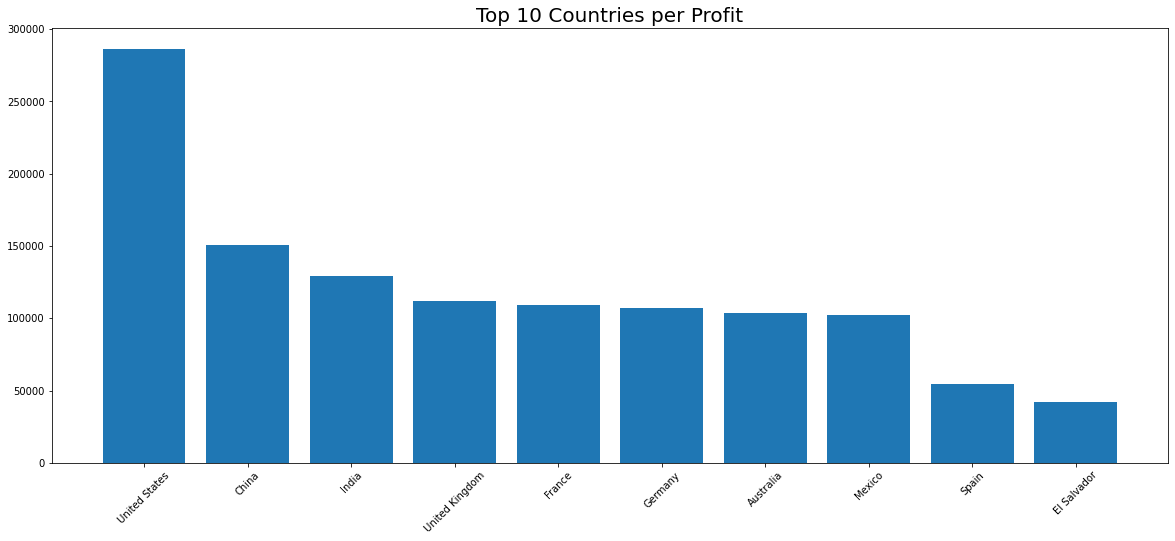

In [168]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
# shows the top countries by profit
plt.title('Top 10 Countries per Profit', fontsize=20)
df_top_profit = df[['Country','Profit']].groupby(['Country']).sum()
df_top_profit.sort_values(by='Profit', ascending=False, inplace=True)
df_top_profit = df_top_profit.head(10)
plt.bar(df_top_profit.index, df_top_profit['Profit'])
plt.xticks(rotation=45)
plt.show()

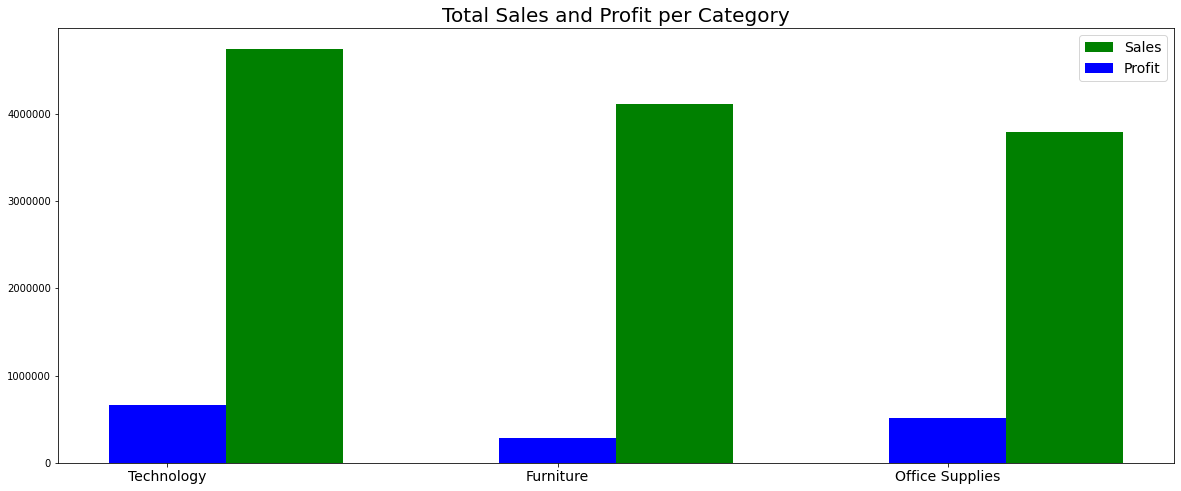

In [228]:
# shows the top category per sales and profit
df_top_profit = df[['Category','Profit','Sales']].groupby(['Category']).sum()
df_top_profit.sort_values(by='Sales', ascending=False, inplace=True)
df_top_profit = df_top_profit

import numpy as np
import matplotlib.ticker as tkr
x  = df_top_profit.index
# to put the column bar side by side we need to specify the length of the bar using width
x_indexes = np.arange(len(x))
width = 0.3

y1 = df_top_profit['Profit'] 
y2 =  df_top_profit['Sales'] 

fig,ax = plt.subplots(nrows=1,ncols=1,sharex=True,figsize=(20,8)) # row x col ->return list 
ax.ticklabel_format(style='plain')

ax.set_title('Total Sales and Profit per Category', fontsize=20)
ax.bar(x_indexes+width,y2, color='green',label='Sales',width=width)
ax.bar(x_indexes,y1, color="blue",label='Profit',width=width)

ax.legend(fontsize=14)

plt.xticks(ticks=x_indexes, labels=x, fontsize=14)
plt.show()
